In [1]:
from math import sqrt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import statsmodels.api as sm
#need to clean this up

In [2]:
#reading in data and examining

df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


# Null values check, null values in 'waterfront', 'view' and 'yr_renovated' features, objects in date and sqft_basement

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.shape

(21597, 21)

In [6]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [9]:
#print percentages of missing values 

In [10]:
df['view'].value_counts(dropna=False)

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [11]:
df['view'].mean()

0.23386272870808952

In [12]:

df['view'].median()

0.0

In [13]:
#could also use mode on ordinal data
median_view = df['view'].median()
df['view'].fillna(median_view, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
df['waterfront'].value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

# Dropping 'waterfront' due to majority of data being 0.0 or NaN

In [15]:
df.drop('waterfront', axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [16]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2005.0       29
2000.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2001.0       15
2008.0       15
2010.0       15
1983.0       15
2015.0       14
1986.0       14
1987.0       14
1994.0       14
1985.0       14
1992.0       13
1995.0       12
1997.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1981.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1946.0        1
1959.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Leng

# what to do about the zeroes and nulls here? for now drop it as 0s would compromise analysis.

In [18]:
df.drop('yr_renovated', axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


# Dropping id as it provides no real analysis driving information

In [19]:
df.drop('id', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


# Date converted to proper datetime format

In [20]:
df['date'] =  pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(10), object(1)
memory usage: 3.0+ MB


In [21]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [22]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
1135.0        1
2300.0        1
243.0         1
1281.0        1
506.0         1
1913.0        1
1852.0        1
862.0         1
2350.0        1
2850.0        1
602.0         1
417.0         1
3500.0        1
20.0          1
266.0         1
283.0         1
2810.0        1
1275.0        1
1880.0        1
875.0         1
295.0         1
1245.0        1
1548.0        1
556.0         1
768.0         1
1920.0        1
1770.0        1
861.0         1
276.0         1
666.0         1
Name: sqft_basement, Len

# Dropping 'sqft_basement' as it is mostly 0s, houses not having basements

In [23]:
df = df.drop('sqft_basement', axis=1)

df = df.drop('sqft_basement', axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(10)
memory usage: 2.8 MB


# Heatmap of correlation, dropping at around .75 correlation
# Note: Better to check after normalizing

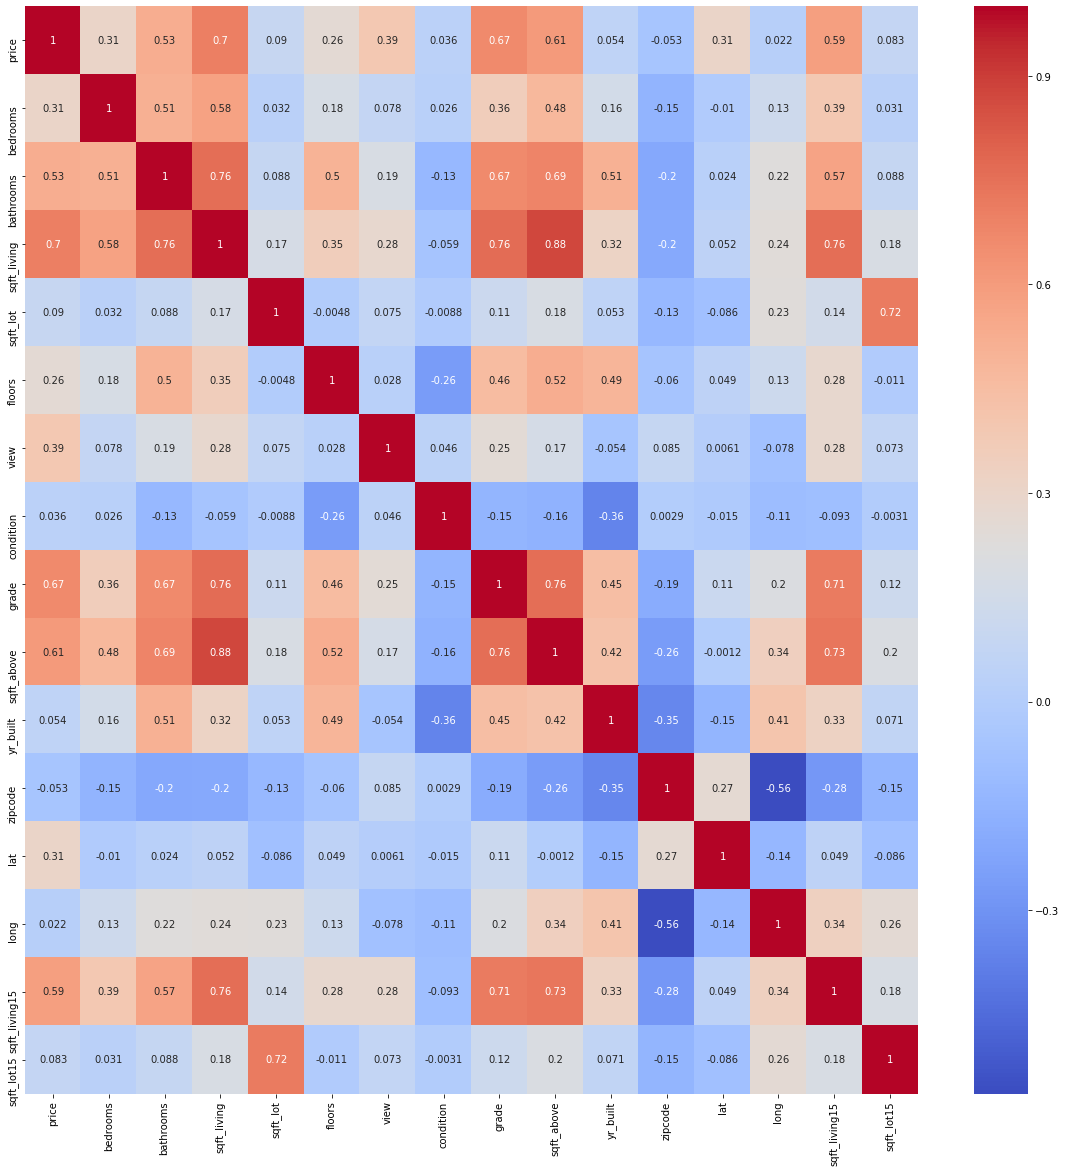

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [26]:
df = df.drop(['bathrooms','sqft_living15', 'sqft_lot', 'sqft_above', 'sqft_lot15', 'date'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
price          21597 non-null float64
bedrooms       21597 non-null int64
sqft_living    21597 non-null int64
floors         21597 non-null float64
view           21597 non-null float64
condition      21597 non-null int64
grade          21597 non-null int64
yr_built       21597 non-null int64
zipcode        21597 non-null int64
lat            21597 non-null float64
long           21597 non-null float64
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


# Most of these features need significant normalization,
# the most normally distributed are grade, year built, location, and then several features with some outliers

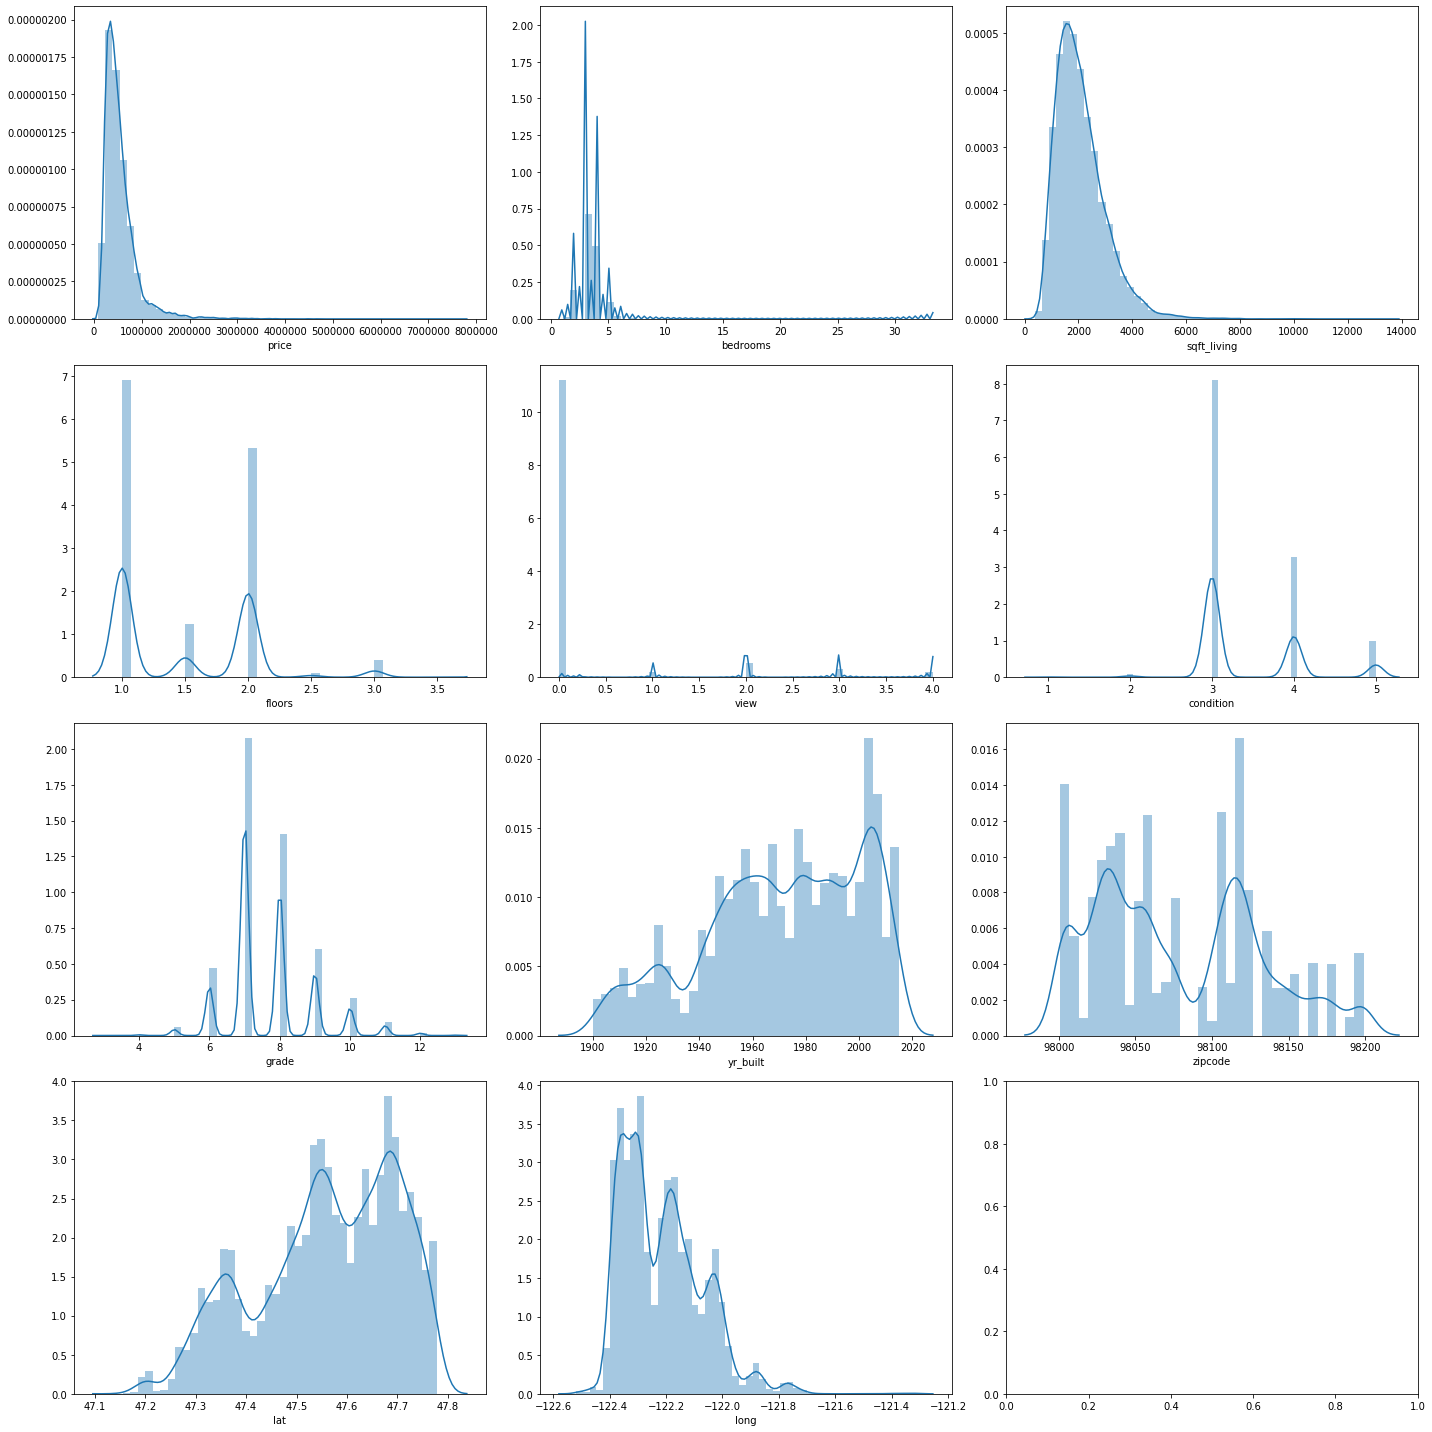

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))

for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//3,i%3])
    
plt.tight_layout()
plt.show()

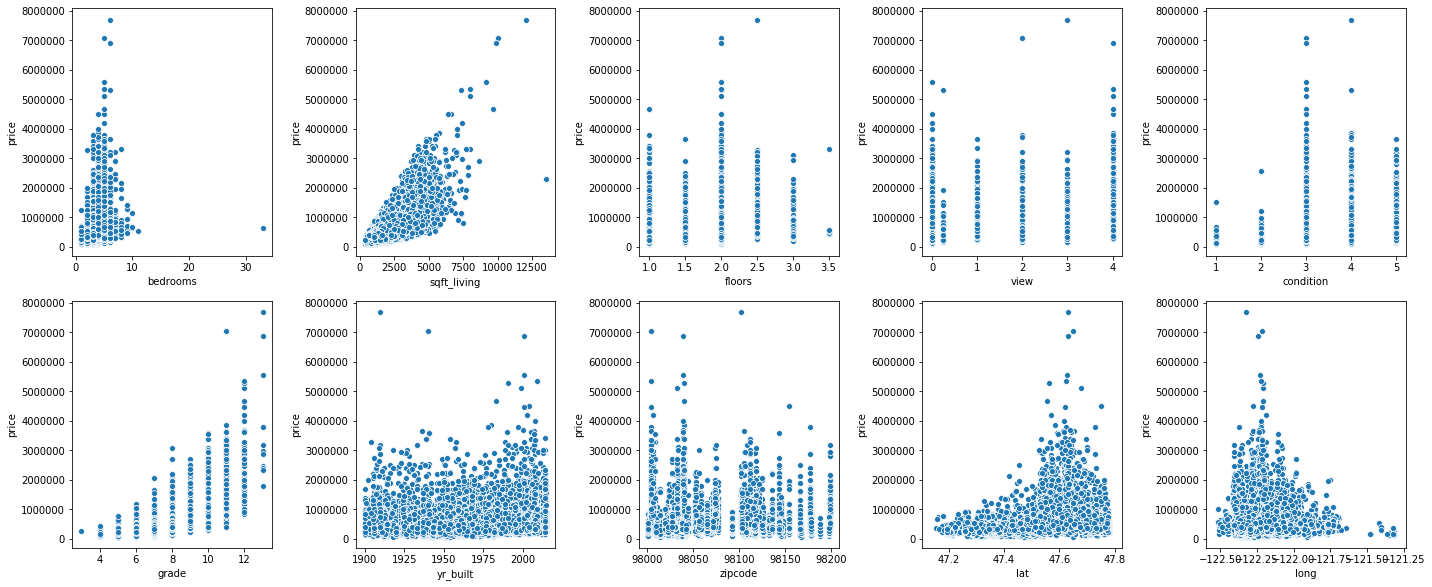

In [29]:
#set figures large to be modified by tight_layout
plt.figure(1, figsize=(20,20))

#core function to create regplot(regression line fitted over scatterplot)
def multi_scatter_plot(x):
    #sns.regplot(df[x], df['price'])
    sns.scatterplot(x, y="price", data=df)
    
#iterating over dataframe minus redundant price column, adding subplots
for index, col in enumerate(df.drop(['price'], axis=1).columns, start=1):
    #adds subplot, using index to increment position of new subplot in a 5 column structure
    plt.subplot(5, 5,index)
    #call function to create plot
    multi_scatter_plot(col)
    
#tidy display for inline and show plot
plt.tight_layout()
plt.show()

# Floors, view, condition, grade, zip code look like they can be treated as categorical?

# TBD: Handling outliers via. trimming/capping(?) engineering

In [30]:
cat_feat = df[['floors', 'view', 'condition', 'grade', 'zipcode']]

for feat in cat_feat:
    print("The feature " + str(feat) + " has the unique values of " + str(df[feat].unique()) + " and a cardinality of "
         + str(len(df[feat].unique())))


The feature floors has the unique values of [1.  2.  1.5 3.  2.5 3.5] and a cardinality of 6
The feature view has the unique values of [0.         0.23386273 3.         4.         2.         1.        ] and a cardinality of 6
The feature condition has the unique values of [3 5 4 1 2] and a cardinality of 5
The feature grade has the unique values of [ 7  6  8 11  9  5 10 12  4  3 13] and a cardinality of 11
The feature zipcode has the unique values of [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039] and a cardinality of 70


# Dropping zipcode as it has larger cardinality but the numbers aren't relevant outside of geospatial analysis

In [31]:
df.drop('zipcode', axis=1, inplace=True)

df.head()

,price,bedrooms,sqft_living,floors,view,condition,grade,yr_built,lat,long
0,221900.0,3,1180,1.0,0.0,3,7,1955,47.5112,-122.257
1,538000.0,3,2570,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,770,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,1960,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,1680,1.0,0.0,3,8,1987,47.6168,-122.045


# Distribution of discrete features - violin plots - TBD: More descriptive plot

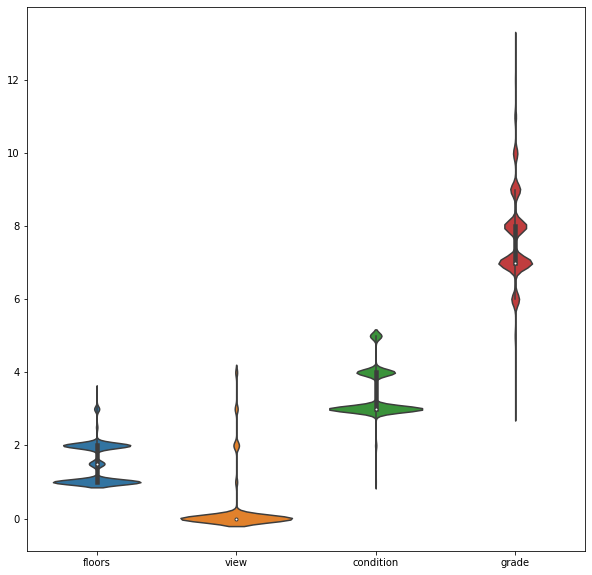

In [32]:
cat_feat = df[['floors', 'view', 'condition', 'grade']]
plt.figure(figsize=(10,10))
sns.violinplot(data=cat_feat)

# TBD: Decide on what to do with ordinals' order and encoding

# TBD: GEOGRAPHIC PLOTTING TO GO HERE OF TOP 25% PRICE LOCATIONS

# SCALING AND STANDARDIZING

In [33]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)
    
    plt.tight_layout()
    plt.show()

# Grade is the most Gaussian distribution, bedroom, condition, long are relatively normal

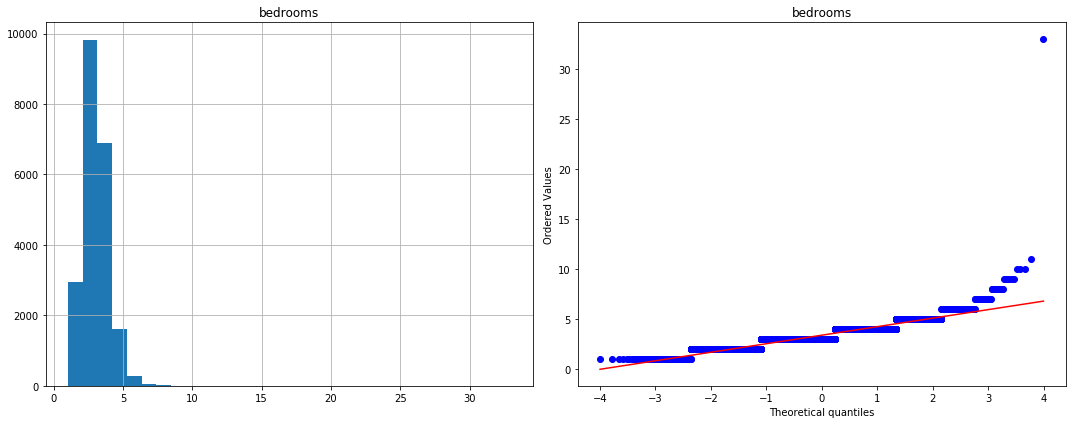

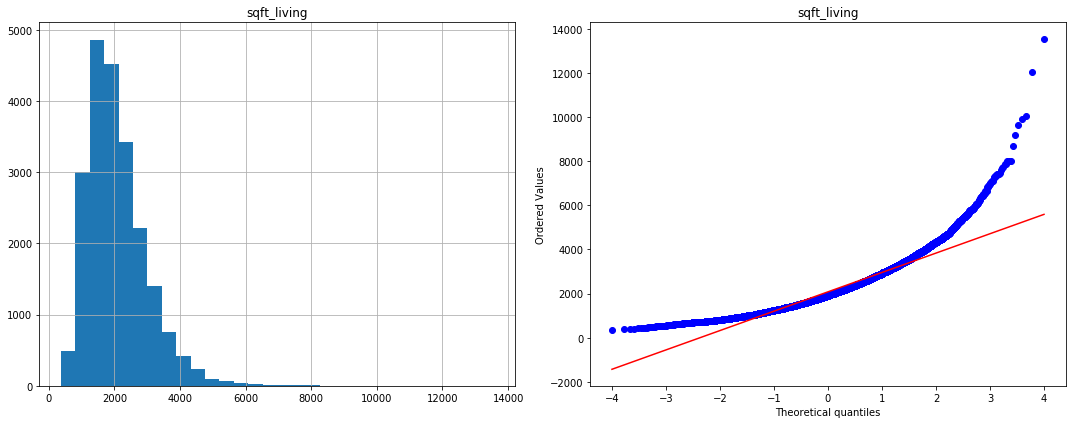

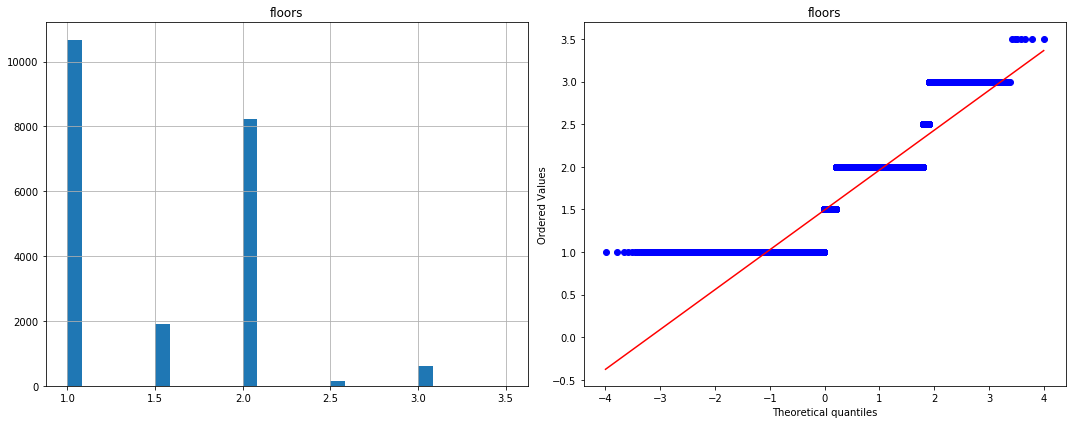

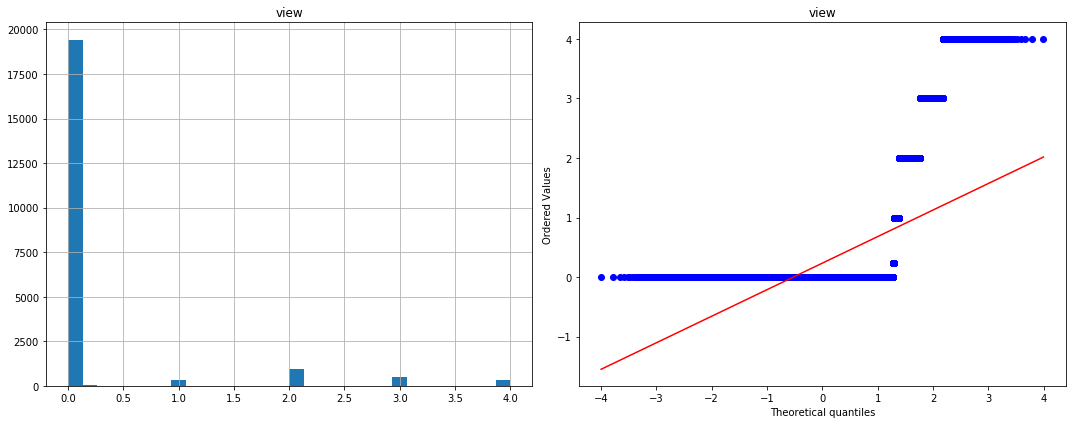

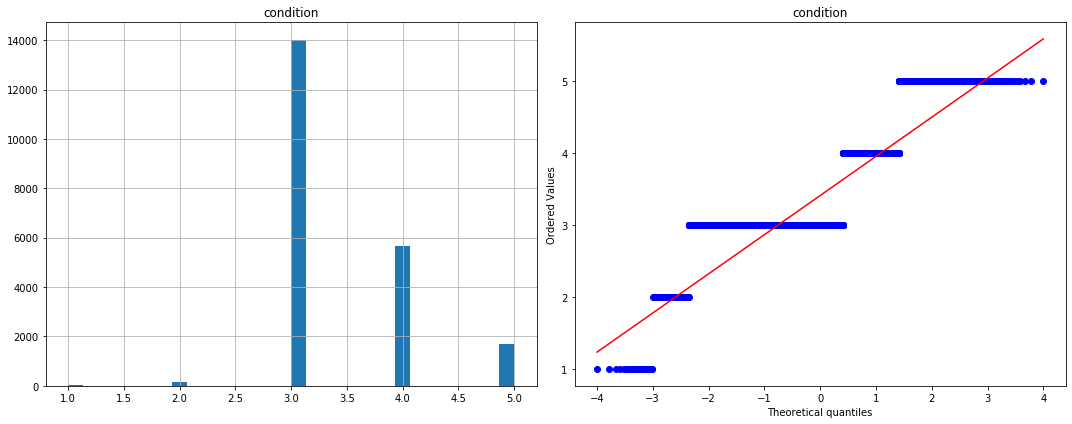

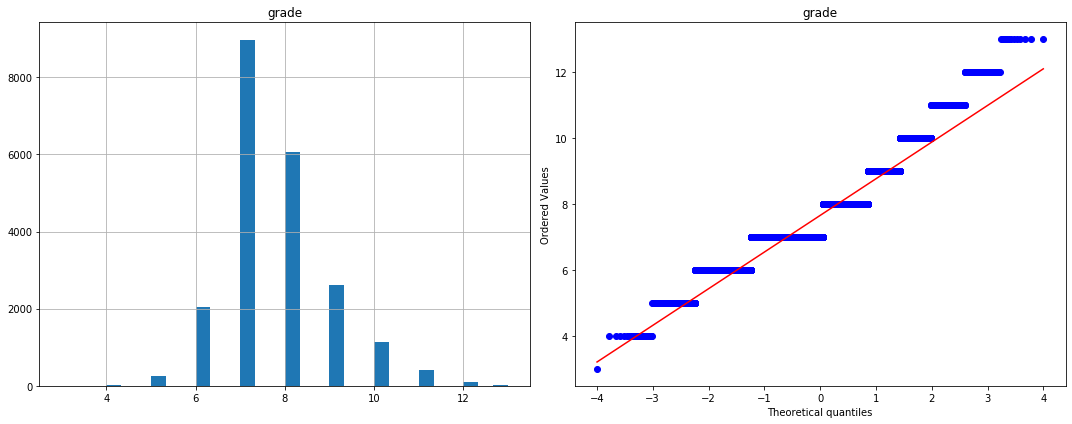

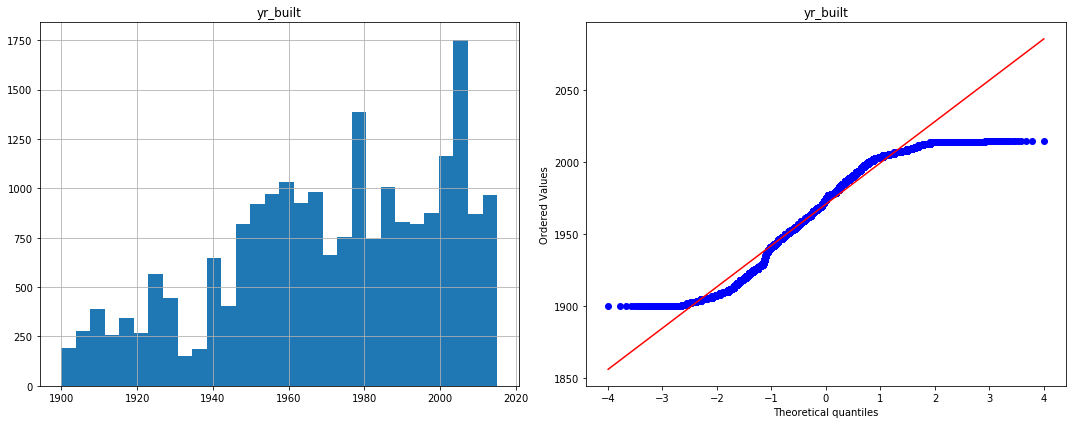

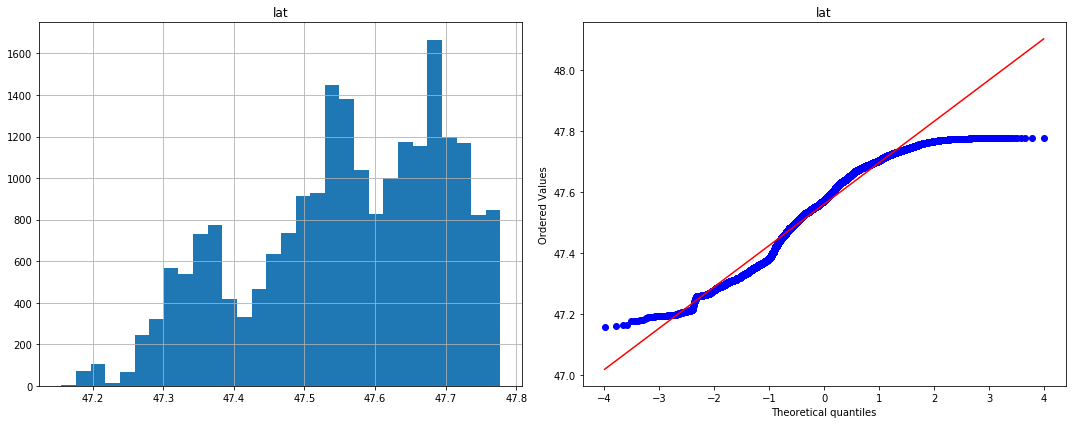

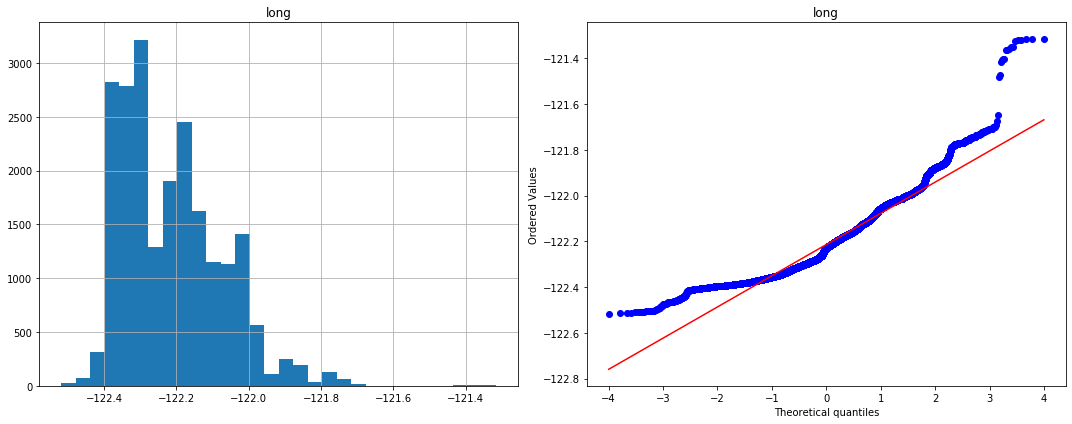

In [34]:
for col in df.drop('price', axis=1).columns:
    diagnostic_plots(df, col)

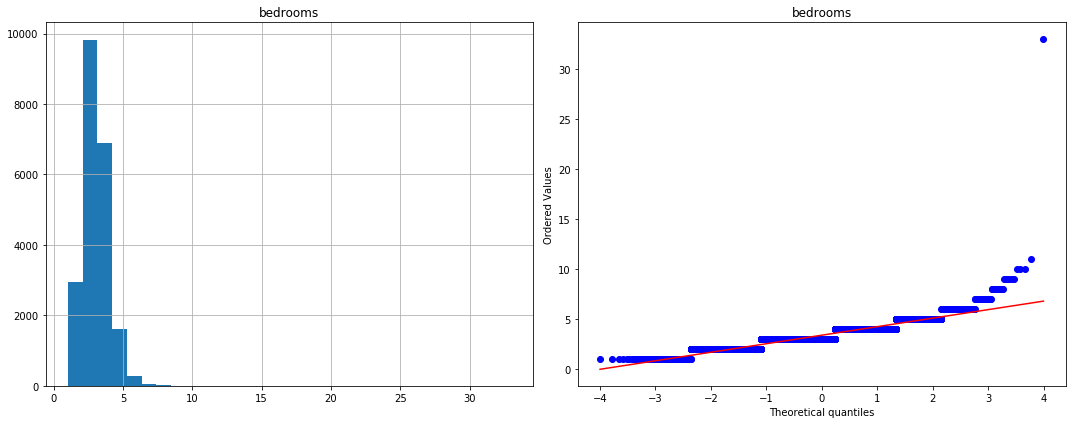

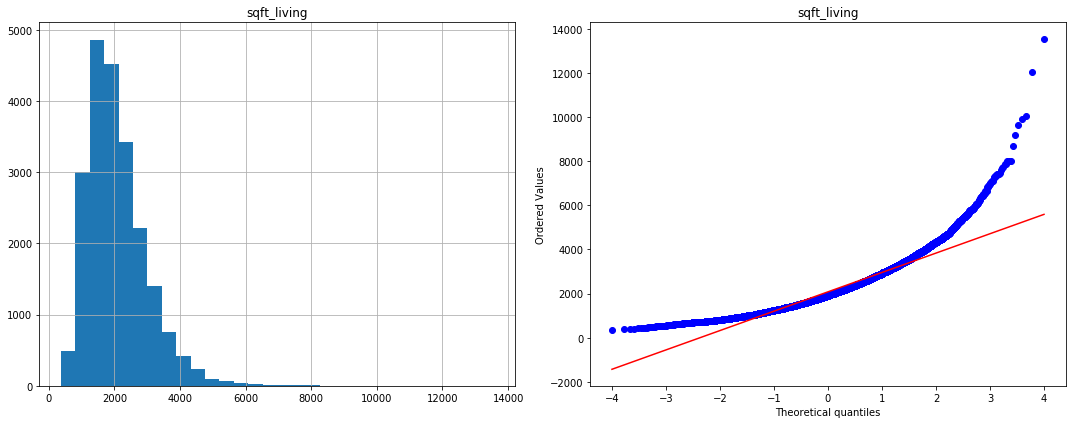

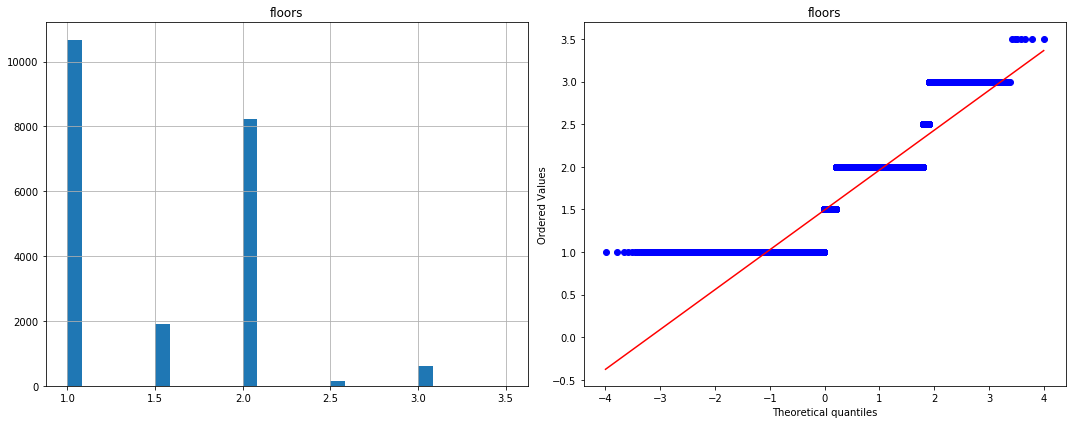

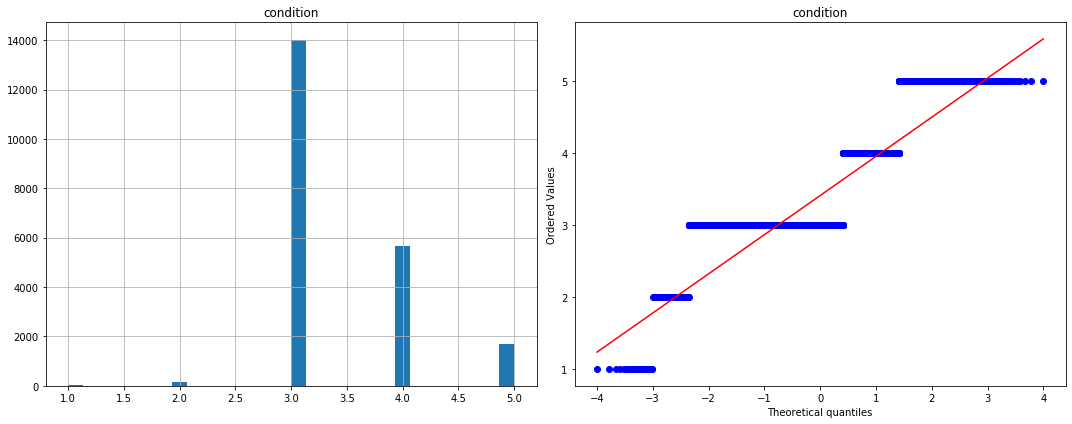

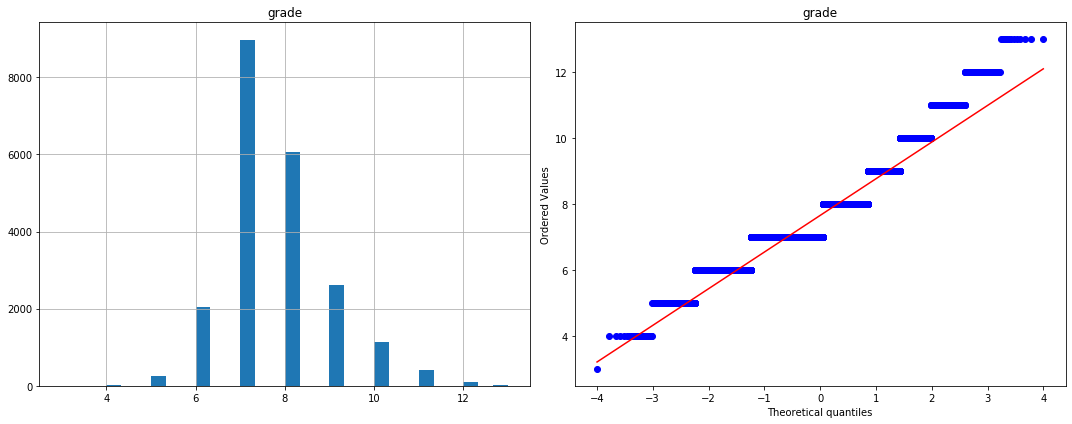

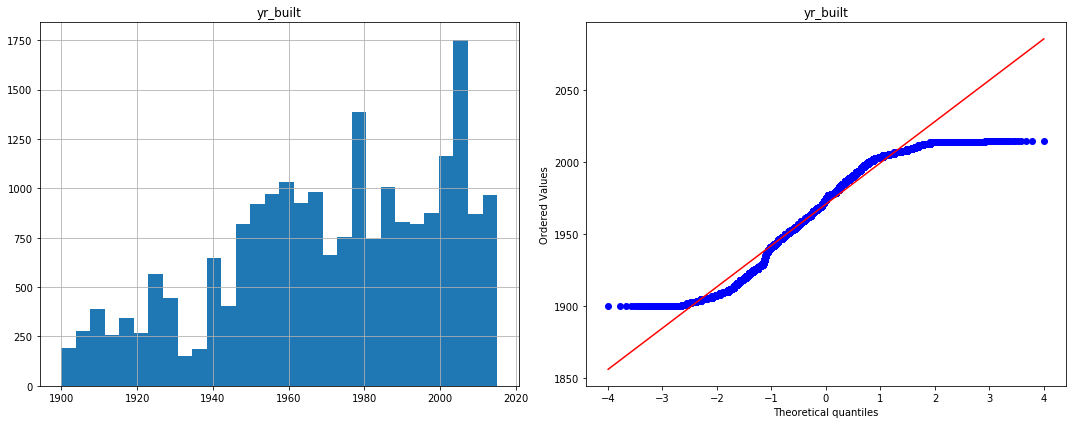

In [35]:
#view has 0 values, lat and long don't make sense to transform?
for col in df.drop(['price', 'view', 'lat', 'long'], axis=1).columns:
    df[col+"_log"] = np.log(df[col])
    diagnostic_plots(df,col)

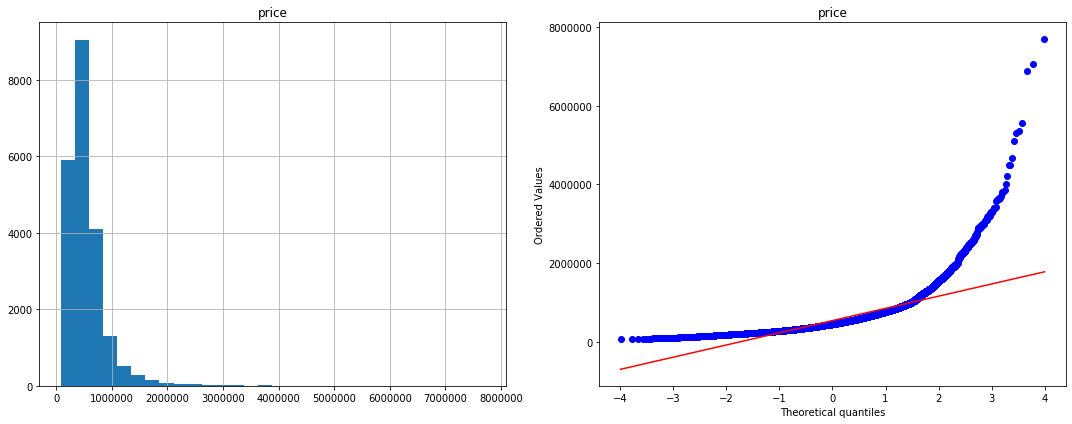

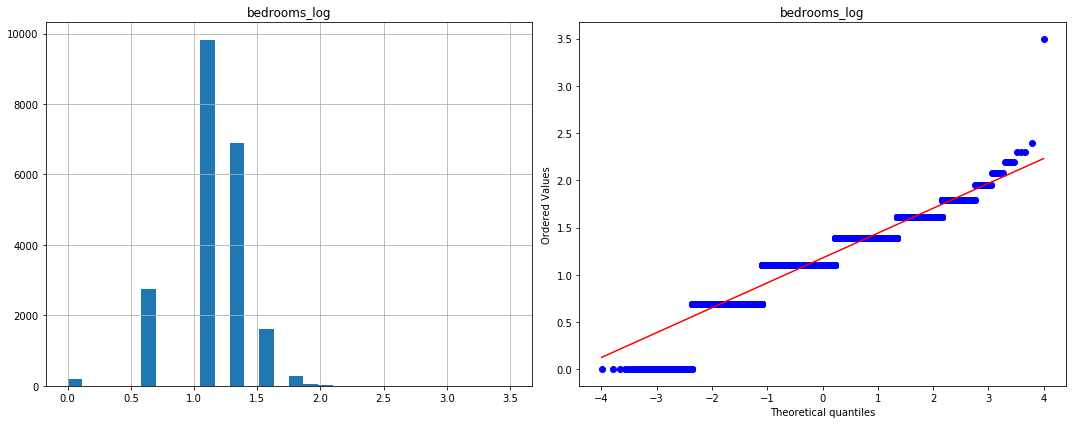

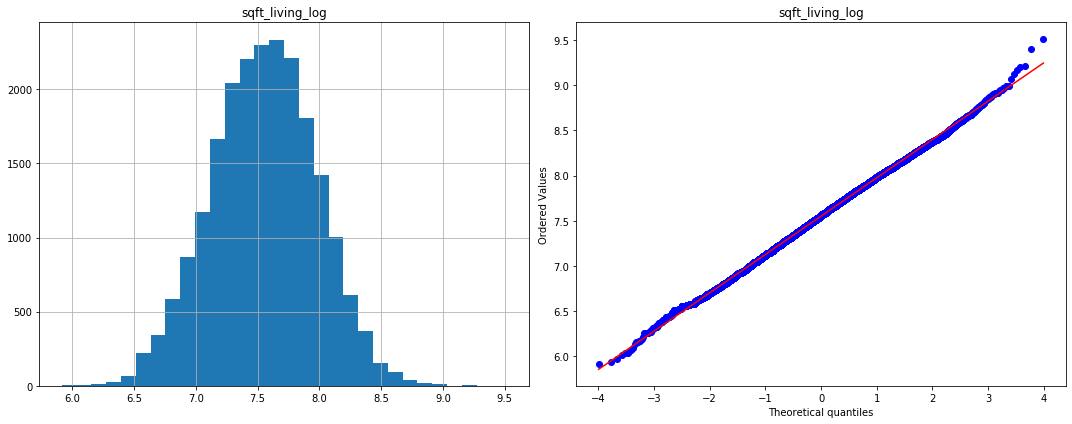

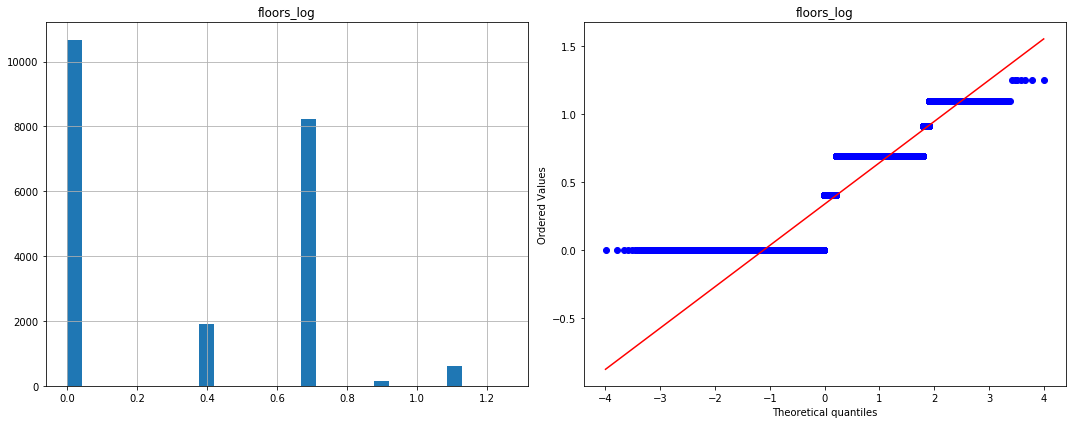

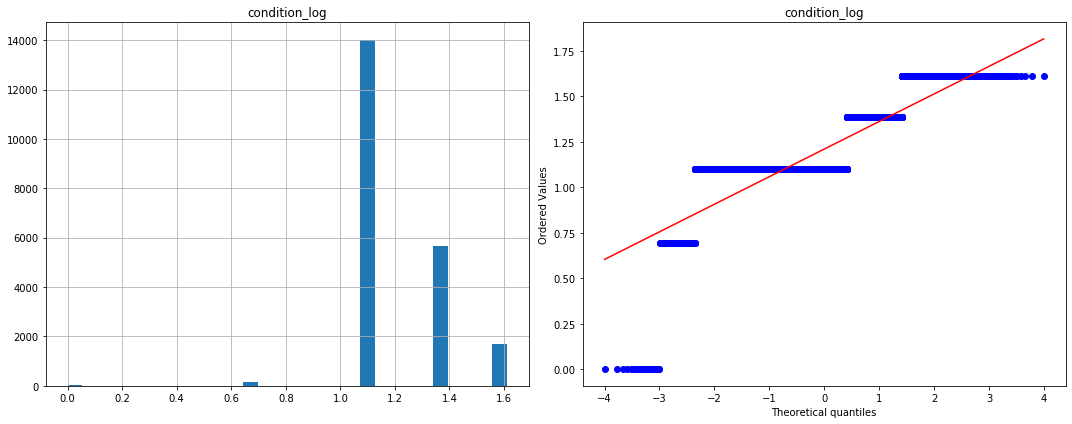

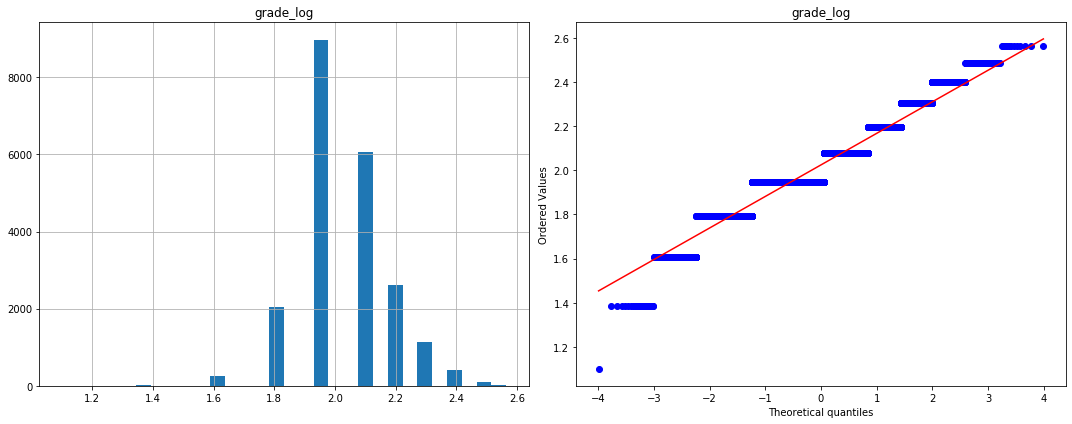

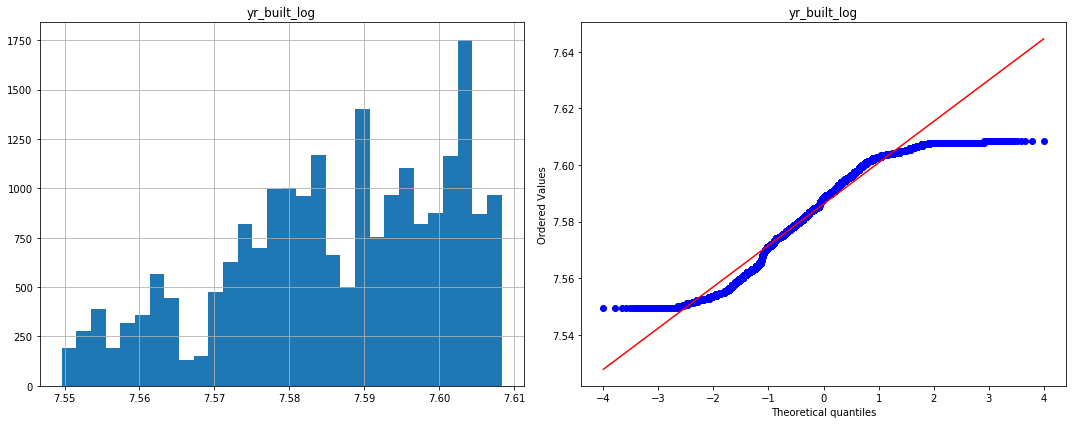

In [36]:
log_values = ['price','bedrooms_log',	'sqft_living_log',	'floors_log',	'condition_log',	'grade_log',	'yr_built_log']

for v in log_values:
    diagnostic_plots(df, v)

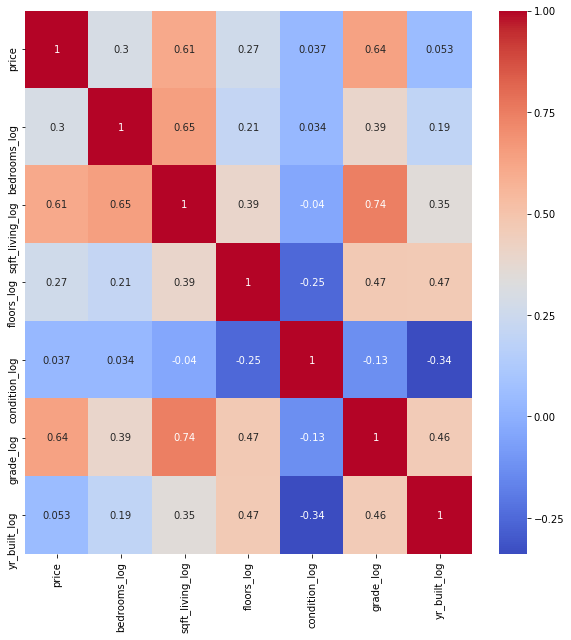

In [37]:
log_df = df[log_values]

plt.figure(figsize=(10,10))
sns.heatmap(log_df.corr(), cmap='coolwarm', annot=True);

In [38]:
log_df.drop('sqft_living_log', axis=1, inplace=True)

log_df.info()

#should fix this ugly error

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
price            21597 non-null float64
bedrooms_log     21597 non-null float64
floors_log       21597 non-null float64
condition_log    21597 non-null float64
grade_log        21597 non-null float64
yr_built_log     21597 non-null float64
dtypes: float64(6)
memory usage: 1012.4 KB


/Users/michael/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


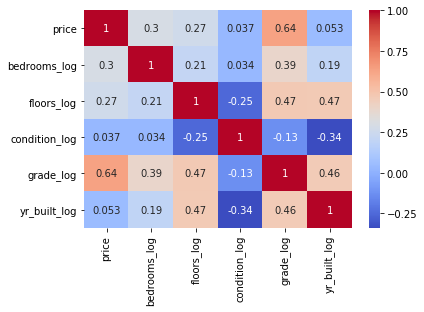

In [39]:
sns.heatmap(log_df.corr(), cmap='coolwarm', annot=True);

# MODELING

In [40]:
X_train, X_test, y_train, y_test = train_test_split(log_df.drop('price', axis=1),
                                                    log_df['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((15117, 5), (6480, 5))

In [41]:
final_columns = X_train.columns

In [42]:
scaler = RobustScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [44]:
np.round(X_train.median(), 1)

bedrooms_log     1.1
floors_log       0.4
condition_log    1.1
grade_log        1.9
yr_built_log     7.6
dtype: float64

In [45]:
np.round(X_train_scaled.median(), 1)

bedrooms_log     0.0
floors_log       0.0
condition_log    0.0
grade_log        0.0
yr_built_log     0.0
dtype: float64

In [46]:
X_train.columns

Index(['bedrooms_log', 'floors_log', 'condition_log', 'grade_log',
       'yr_built_log'],
      dtype='object')

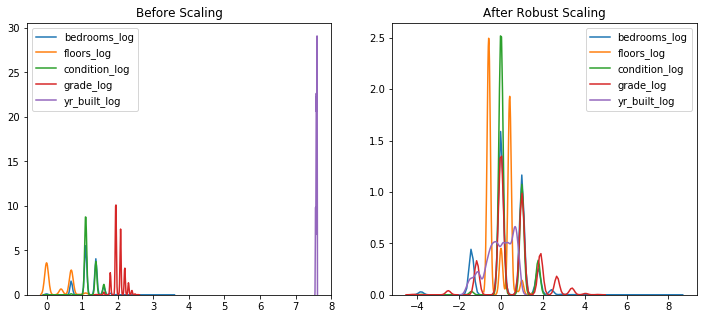

In [58]:
#variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['bedrooms_log'], ax=ax1)
sns.kdeplot(X_train['floors_log'], ax=ax1)
sns.kdeplot(X_train['condition_log'], ax=ax1)
sns.kdeplot(X_train['grade_log'], ax=ax1)
sns.kdeplot(X_train['yr_built_log'], ax=ax1)

# after
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['bedrooms_log'], ax=ax2)
sns.kdeplot(X_train_scaled['floors_log'], ax=ax2)
sns.kdeplot(X_train_scaled['condition_log'], ax=ax2)
sns.kdeplot(X_train_scaled['grade_log'], ax=ax2)
sns.kdeplot(X_train_scaled['yr_built_log'], ax=ax2)

plt.show()

In [48]:
X_train_scaled.head()

,bedrooms_log,floors_log,condition_log,grade_log,yr_built_log
0,0.000000,-0.584963,0.000000,0.000000,-0.155786
1,-1.409421,-0.584963,1.000000,-1.154415,-1.102304
2,0.000000,-0.584963,1.775660,1.882063,-0.379301
3,1.000000,0.415037,0.000000,2.671094,0.551903
4,-1.409421,0.000000,-1.409421,0.000000,-0.044454


In [64]:
X = X_train_scaled[['grade_log', 'condition_log', 'yr_built_log']] 
Y = y_train
 
# with sklearn, multiple linear regression fitting!
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 370038.23918837495
Coefficients: 
 [ 257054.55863157   23427.16821618 -163919.7528438 ]


In [50]:
#make predictions
y_train_pred = regr.predict(X)

In [51]:
X_train_preds = regr.predict(X)
X_test_preds = regr.predict(X_test_scaled[['grade_log', 'condition_log', 'yr_built_log']])

In [52]:
X_train_preds

array([395574.6082815 , 277407.14716125, 957604.6614929 , ...,
       665101.06706004, 525772.46144642, 623452.13917536])

# R2 score for training predictions

In [53]:
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()

train r2: 0.46900641260590714



# Visualizing regression predictions vs. actual - look into negative predictions, shouldn't occur

Text(0, 0.5, 'Predicted Price')

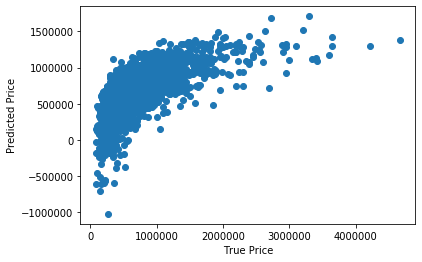

In [54]:
plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

# Modeling with Ordinary Least Squares with SM for better stats analysis of regression

In [69]:
X = sm.add_constant(X)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(list(Y), X).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X, Y], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     4450.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:49:00   Log-Likelihood:            -2.1065e+05
No. Observations:               15117   AIC:                         4.213e+05
Df Residuals:                   15113   BIC:                         4.213e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            3.7e+05   2967.517    124.696      0.000    3.64e+05    3.76e+05
grade_log      2.571e+05   2241.478    114.681      0.000    2.53e+05    2.61e+05
condition_log  2.343e+04   3715.759      6.305      0.000    1.61e+04    3.07e+04
yr_built_log  -1.639e+05   4011.323    -40.864      0.000   -1.72e+05   -1.56e+05
==============================================================================
Omnibus:                    15756.962   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2518600.473
Skew:                           4.893   Prob(JB):                         0.00
Kurtosis:                      65.472   Cond. No.                         2.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Inverse scale, reverse log, to examine coef
# Scaling not required, gives info on importance moreso than being a requirement
# Include more variables, maybe keep at lower thresholds of corr
# Residual plotting

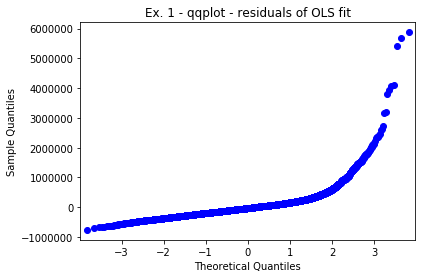

In [93]:
res = model_fit.resid # residuals
probplot = sm.ProbPlot(res)
fig = probplot.qqplot()
h = plt.title('Ex. 1 - qqplot - residuals of OLS fit')
plt.show()

In [56]:
#not sure how to interpret several of these stats
#RMSE?
#"Are the coeffs, slopes, intercepts in appropriate units?" - don't think so?


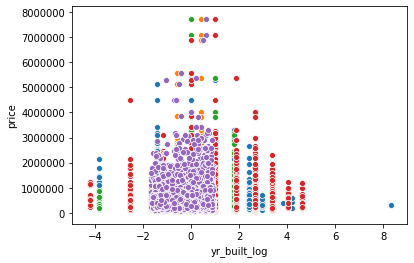

In [57]:
# check for missed non-linearity

for x in X_train_scaled: 
    sns.scatterplot(x, y=Y, data=X_train_scaled)